In [151]:
#import libraries
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [152]:
# Load training data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_100.csv")

test_data = pd.read_csv("../ValidationData/neodata/fault_all_100.csv")

train_data.head()

,Pdis,Psuc,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,CprPower,Density,Tamb,Tset,target
0,7.954125,2.665122,-2.568733,31.125581,46.604102,5.162318,3.144339,5.713071,0.003756,45.839791,1123.985821,5.983587,10,0,0
1,7.954127,2.665121,-2.568740,31.125587,46.604124,5.162321,3.144339,5.713079,0.003753,45.839852,1123.988434,5.983586,10,0,0
2,7.954128,2.665120,-2.568747,31.125592,46.604146,5.162325,3.144340,5.713086,0.003750,45.839913,1123.991044,5.983584,10,0,0
3,7.954129,2.665120,-2.568754,31.125598,46.604167,5.162328,3.144340,5.713094,0.003747,45.839973,1123.993653,5.983583,10,0,0
4,7.954130,2.665119,-2.568761,31.125603,46.604189,5.162332,3.144341,5.713101,0.003744,45.840034,1123.996259,5.983581,10,0,0


Text(0.5, 1.0, 'Training data')

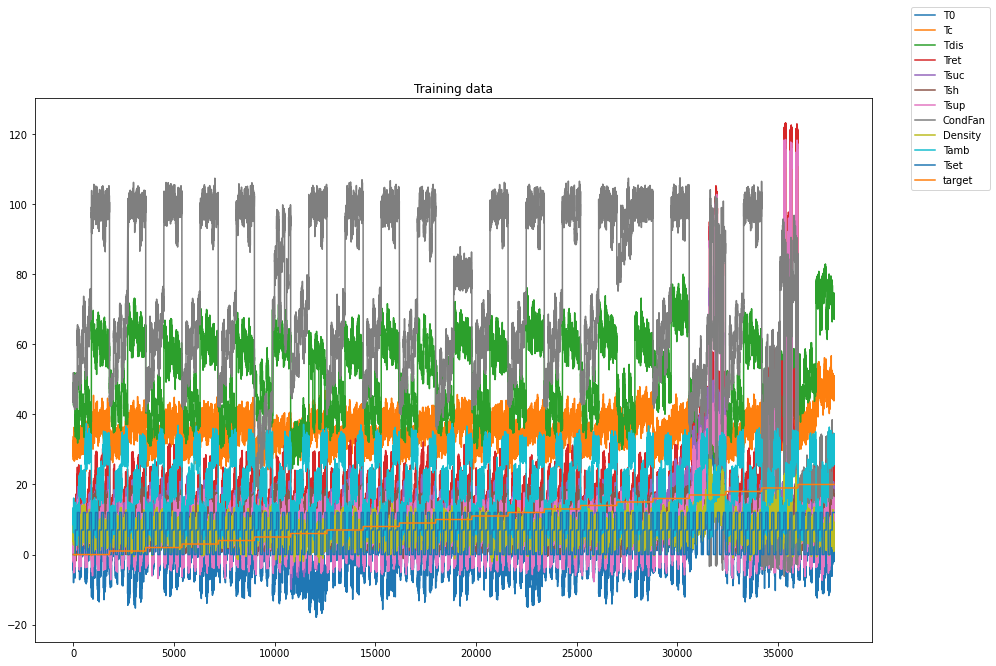

In [155]:
fig, axs = plt.subplots(figsize=(15,10))

axs.plot(train_data.drop(['Pdis','Psuc','CprPower'],axis=1))
plt.legend(train_data.drop(['Pdis','Psuc','CprPower'],axis=1).keys(), bbox_to_anchor=(1.04, 1), loc="center left")
plt.title('Training data')


In [154]:
#adding noise
mean = 0
variance = 2

for column in train_data.drop(['target','Tset'],axis=1):
        noise = np.random.normal(mean,variance,len(train_data))
        train_data[column] += noise

train_data

,Pdis,Psuc,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,CprPower,Density,Tamb,Tset,target
0,8.603243,5.426143,-1.863983,30.174713,44.690301,7.640135,3.612688,5.286693,1.331326,44.589875,1125.125662,4.829372,10.925279,0,0
1,5.907652,5.927836,0.307641,33.383949,45.431774,7.199672,5.018413,1.017679,3.205805,43.403995,1124.751179,6.290505,8.437906,0,0
2,10.418011,0.941695,-0.100503,29.461563,49.036014,3.271033,-1.456220,4.333839,3.551907,47.002352,1120.963064,6.289579,12.505683,0,0
3,12.431737,2.134613,-3.919685,30.646500,49.165641,5.334717,6.380680,4.184288,1.310650,47.917703,1124.069770,5.043030,11.453624,0,0
4,7.036008,2.035445,-3.020474,27.065547,43.620876,0.895722,3.075450,9.920371,-0.134782,46.850134,1125.562159,7.440500,12.515695,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37795,11.858269,1.613225,4.789765,45.241120,69.186933,19.130639,14.919550,15.914957,12.581925,31.123743,5670.146452,8.427475,26.709727,12,20
37796,7.152362,2.323804,-0.077941,48.557568,67.133137,23.767274,15.049378,15.537309,10.387300,29.233735,5672.699975,7.059048,29.768427,12,20
37797,12.966500,2.748398,1.387029,45.002829,68.739969,25.371539,14.523014,10.143524,13.400829,30.040074,5669.883596,5.021216,34.542250,12,20
37798,12.947408,5.843527,2.727547,46.647304,72.278553,21.131559,15.613219,16.955340,12.156745,28.613465,5673.051912,8.455945,30.113553,12,20


Text(0.5, 1.0, 'Training data with noise')

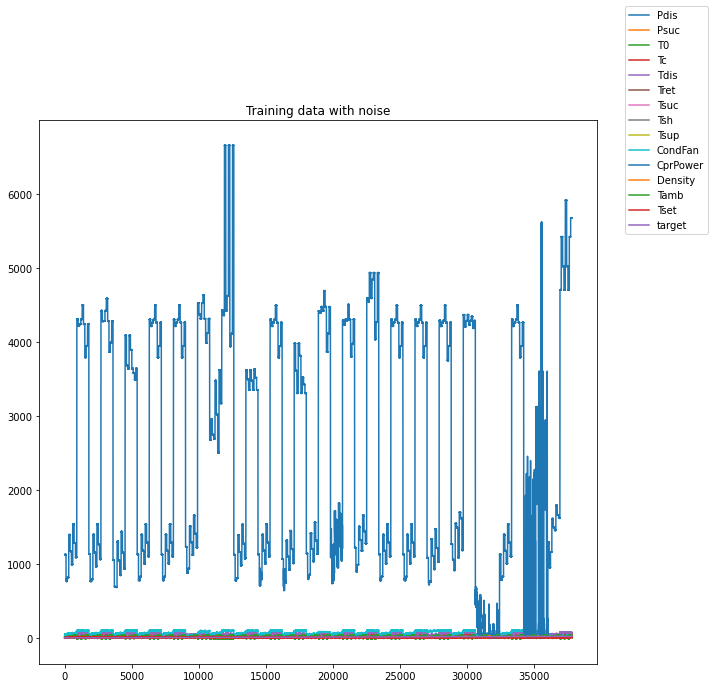

In [108]:
fig, axs = plt.subplots(figsize=(10,10))

axs.plot(train_data)
plt.legend(train_data.keys(), bbox_to_anchor=(1.04, 1), loc="center left")
plt.title('Training data with noise')


In [109]:
#standardization
import standardization as sd

# Normalization / conditioning
standardizer = sd.standardization(train_data,'target')

trn = standardizer.transform(train_data)
tst = standardizer.transform(test_data)
#.drop('target',axis=1)

targets = train_data['target'].unique().tolist()
labels_trn = train_data['target']
labels_tst = test_data['target']

trn

,Pdis,Psuc,T0,Tc,Tdis,Tret,Tsuc,Tsh,Tsup,CondFan,CprPower,Density,Tamb,Tset,target
0,-1.214512,-0.858879,-0.638529,-1.574049,-0.142082,-1.096736,-0.823852,-0.614053,-0.778595,-1.010626,-0.859818,0.807521,-0.916790,-1.409259,0
1,0.115973,0.752052,-0.572871,-0.587319,-0.100780,-1.181248,-0.875925,-1.233694,-0.693088,-0.805293,-0.859704,-0.612288,-1.198597,-0.674823,0
2,-0.717427,0.429049,-0.455584,-0.747560,-0.550381,-0.943278,-0.739704,-1.072069,-0.724688,-1.187215,-0.858446,0.150011,-0.843314,-0.730529,0
3,-2.360895,-0.285488,-0.653102,-1.892920,-0.488702,-0.879346,-1.010279,-0.981824,-0.610311,-1.107263,-0.858348,-1.180027,-1.237921,-1.479003,0
4,-0.869848,0.231284,-0.752345,-0.163507,-0.602467,-1.105913,-1.260314,-0.798091,-0.688396,-1.099525,-0.859064,-0.043117,-0.936363,-0.909258,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37795,0.894400,-0.930581,0.149237,3.186578,1.176570,0.514755,0.275634,0.271599,0.131976,-1.585061,1.887474,0.174149,1.396561,1.432707,20
37796,3.253819,-0.172837,0.002647,3.288225,1.865676,0.463069,0.672356,0.589814,0.195771,-1.623462,1.885944,0.655216,1.462632,0.895700,20
37797,0.971311,-0.681666,0.060797,3.211071,1.939116,0.693734,0.339220,0.876045,0.250100,-1.627624,1.887150,-1.651266,1.086158,1.561955,20
37798,3.338918,-1.341972,0.169031,3.411896,1.628273,0.235607,0.476725,0.782482,0.396167,-1.775630,1.884048,-0.175096,1.051683,0.264224,20


# Fittig the training data first

In [110]:
from sklearn import svm

clf = svm.SVC( kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)
clf.fit(trn.drop('target',axis=1), labels_trn)


SVC(C=1000, decision_function_shape='ovo', gamma=0.01)

In [111]:
#predicting
numbers = targets

frac = 1
sample = trn.sample(frac=frac)
truth = sample['target'].to_numpy()

predict = clf.predict(sample.drop('target',axis=1))

print(truth)
print(predict)


# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for i in range(len(predict)):
    #print(int(truth[i]))
    conf_matrix[numbers.index(int(truth[i])),numbers.index(int(predict[i]))] += 1


[10  6 14 ... 18  4  7]
[10  6  9 ... 12  4  7]


In [112]:
print(f"Accuracy: {clf.score(trn.drop('target',axis=1),trn['target'])*100}%")

Accuracy: 60.526455026455025%


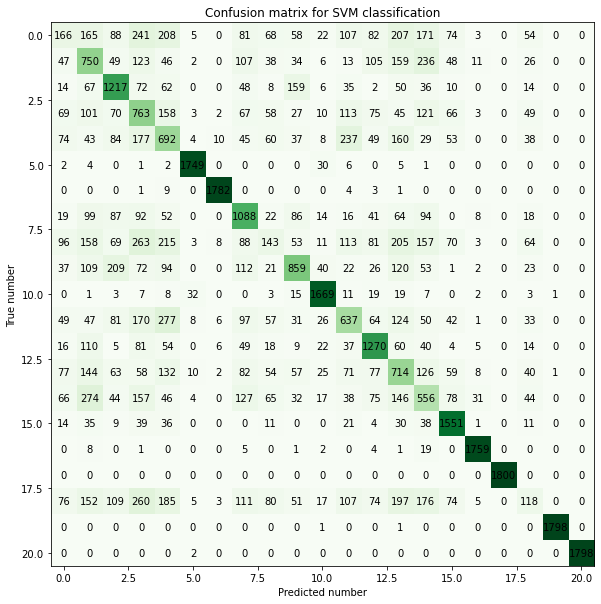

In [113]:
#plot the confusion matrix

fig , axs = plt.subplots(figsize=(10,10))
axs.imshow(conf_matrix,cmap="Greens")
axs.set_xlabel("Predicted number")
axs.set_ylabel("True number")
axs.set_title("Confusion matrix for SVM classification")

width, height = conf_matrix.shape

for x in range(width):
    for y in range(height):
        axs.annotate(str(int(conf_matrix[x][y])), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')

# Testing on validation data

In [114]:
numbers = targets
truth = tst['target']

predict = clf.predict(tst.drop('target',axis=1))

print(truth.to_numpy())
print(predict)


# Initialize empty confusion matrix
conf_matrix = np.zeros((len(numbers),len(numbers)))

# Iterate through each prediction and update confusion matrix accordingly
for i in range(len(predict)):
    conf_matrix[numbers.index(int(truth[i])),numbers.index(int(predict[i]))] += 1


[ 0  0  0 ... 20 20 20]
[ 9  9  9 ... 20 20 20]


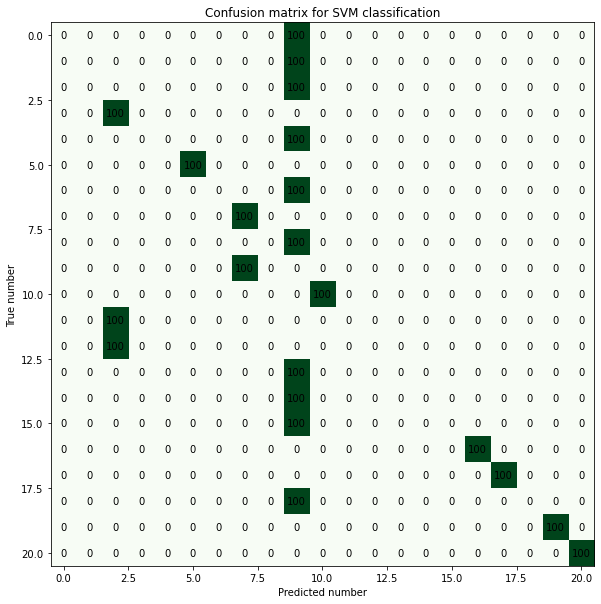

In [115]:
#plot the confusion matrix

fig , axs = plt.subplots(figsize=(10,10))
axs.imshow(conf_matrix,cmap="Greens")
axs.set_xlabel("Predicted number")
axs.set_ylabel("True number")
axs.set_title("Confusion matrix for SVM classification")

width, height = conf_matrix.shape

for x in range(width):
    for y in range(height):
        axs.annotate(str(int(conf_matrix[x][y])), xy=(y, x), 
            horizontalalignment='center',
            verticalalignment='center')

In [116]:
print(f"Accuracy: {clf.score(tst.drop('target',axis=1),tst['target'])*100}%")

Accuracy: 33.33333333333333%
